In [ ]:
!pip install PyMuPDF openai langchain


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 294.5 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 26.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 36.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 362.9/362.9 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 997.8/997.8 kB 16.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.9/318.9 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 393.9/393.9 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.1/149.1 kB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 1.4 MB/s eta 0:00:00
  Attempting uninstall: tenacity
    Found exi

In [ ]:
!gdown 1yVbhJWh4L1unDbDT4APOusTXlwic7aE9


Downloading...
From: https://drive.google.com/uc?id=1yVbhJWh4L1unDbDT4APOusTXlwic7aE9
To: /content/PA - Consolidated lecture notes.pdf
100% 4.28M/4.28M [00:00<00:00, 26.0MB/s]


# Multimodal RAG
Multimodal Retrieval-Augmented Generation (RAG) is an advanced AI system that combines multiple types of data—such as text, images, and potentially other modalities like audio or video—to enhance the capabilities of language models in generating accurate and contextually relevant responses. In a standard RAG system, textual data is typically used, but in a multimodal setup, the system can retrieve and process information from multiple types of data (text, images, etc.) simultaneously.

## Why is Multimodal RAG Needed?
- **Images and Text Together:** Many real-world scenarios involve both visual and textual information. For example, a medical report might include both a doctor's notes (text) and X-ray images. A standard text-only RAG system would miss the visual context, potentially leading to incomplete or incorrect responses. By incorporating images, a multimodal RAG system can fully understand and generate more accurate answers.

- **Complementary Information:** Text and images often provide complementary information. A diagram in a technical document might clarify concepts described in the text. Without both, understanding is incomplete. Multimodal RAG systems can retrieve and integrate these different types of data for a holistic response.



## Applications of Multimodal RAG

- E-commerce:

Enhance product search by combining visual product images with text descriptions, improving the accuracy of recommendations.
- Education:

Support interactive learning by retrieving relevant diagrams, charts, or videos along with textual explanations to help students better understand complex topics.
- Customer Support:

Integrate visual aids in support responses, such as including annotated screenshots or diagrams when explaining how to resolve a technical issue.

## Creating multimodal rags

there are no solid pre made options to make multimodal rags out of the box.

there are three major methds that people go for

###Option 1: Multimodal Embeddings for Retrieval and Multimodal LLM for Synthesis
1. Use Multimodal Embeddings (such as CLIP) to Embed Images and Text:

Multimodal embeddings involve encoding both images and text into a shared vector space. Models like CLIP (Contrastive Language–Image Pre-training) are designed to create embeddings that allow images and their textual descriptions to be represented in the same space.
This enables the system to compare and retrieve images and text based on their semantic similarity, regardless of their modality.
2. Retrieve Both Using Similarity Search:

Once embedded, both text and image data can be stored in a vector database. When a query is made, the system can perform a similarity search across both types of embeddings to retrieve the most relevant content.
This allows for seamless retrieval of both text and images that are semantically related to the query.
3. Pass Raw Images and Text Chunks to a Multimodal LLM for Answer Synthesis:

After retrieval, the system passes both the raw images and relevant text chunks to a multimodal language model (LLM) capable of processing and synthesizing both modalities.
This LLM generates a comprehensive answer that integrates the visual and textual information, providing a richer and more contextually relevant response.


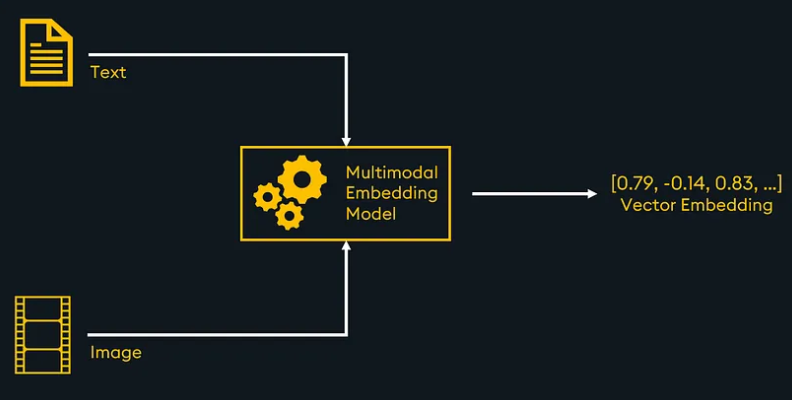

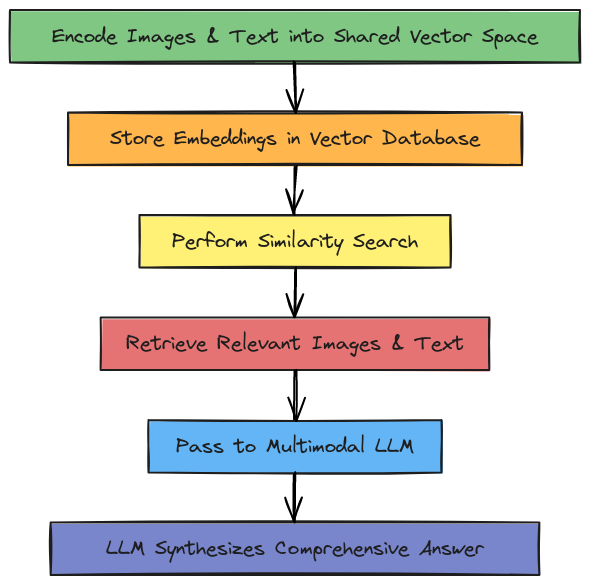


###Option 2: Multimodal LLM for Image Summarization, Text Embedding for Retrieval, and Text Synthesis
1. Use a Multimodal LLM (such as GPT-4V, LLaVA, or FUYU-8b) to Produce Text Summaries from Images:

In this approach, a multimodal LLM is used to process images and generate textual summaries. The LLM interprets the image and describes its content in a textual form.
This text can include descriptions, explanations, or any other relevant information extracted from the image.
2. Embed and Retrieve Text:

The generated text summaries, along with any other text data, are embedded using a text embedding model (like OpenAI's text embeddings).
Retrieval is then performed based on these text embeddings. This allows the system to search for and retrieve relevant textual information, including the text summaries derived from images.
3. Pass Text Chunks to an LLM for Answer Synthesis:

The retrieved text chunks, including those summarizing images, are then passed to a standard LLM (not necessarily multimodal) for answer synthesis.
The LLM generates a response based on the textual content, synthesizing information from both the original text and the image summaries.


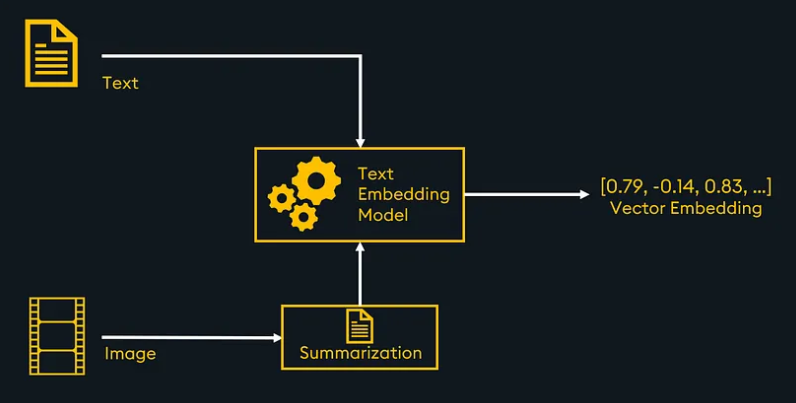

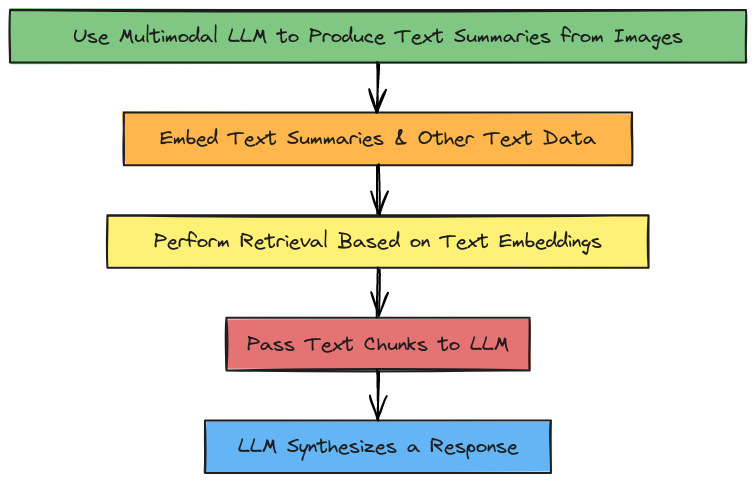


###Option 3: Multimodal LLM for Image Summarization, Summary Embedding and Retrieval, and Combined Synthesis
1. Use a Multimodal LLM (such as GPT-4V, LLaVA, or FUYU-8b) to Produce Text Summaries from Images:

Similar to Option 2, this method involves using a multimodal LLM to generate text summaries from images.
2. Embed and Retrieve Image Summaries with a Reference to the Raw Image:

The difference here is that these text summaries are embedded along with a reference to the original image. This reference could be in the form of a file path, URL, or any other identifier that links back to the raw image.
The retrieval process involves searching for relevant summaries, but with the added capability of easily accessing the original images.
3. Pass Raw Images and Text Chunks to a Multimodal LLM for Answer Synthesis:

When synthesizing the final answer, the system retrieves both the textual summaries and the raw images.
These are then passed to a multimodal LLM, which can process and integrate both types of information, generating a response that considers both the textual summaries and the visual content.

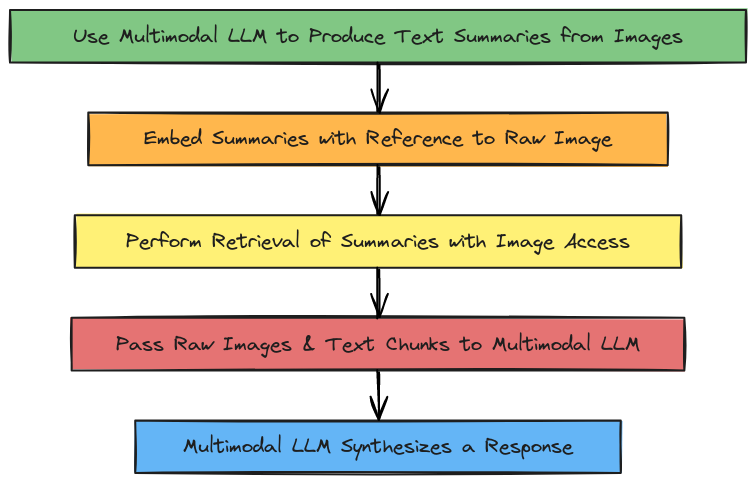

we'll be using the third method as we want to preserve the original image and save its reference as well.

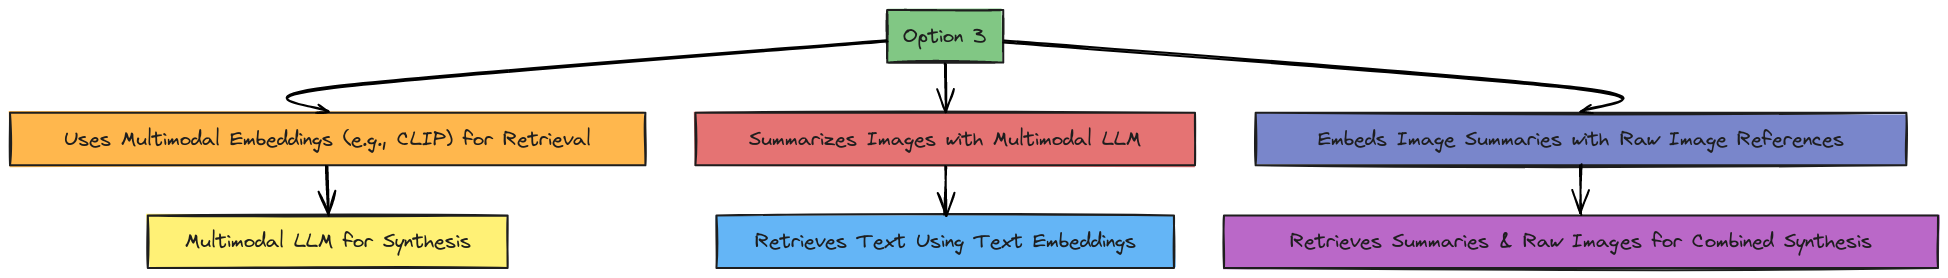

## Extracting text and images from the pdf

we'll loop throught the pdf and extract all the text and images from the pdf and save it as a png file in another folder so that we have a reference to them whenever required.

- for this we will be using **fitz** library (which is a wrapper for PyMuPDF) to extract text, images from a PDF file .
- it is simple to use and gets the job done, there are other similar libraries for manipulating and extracting data from a pdf, we are using one of it.


In [ ]:
import fitz  # PyMuPDF wrapper for simplicity
import os

def extract_images_from_pdf(pdf_path, output_folder):
    # Open the PDF file
    pdf_document = fitz.open(pdf_path)

    # Create the output folder if it doesn't exist
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Loop through each page
    for page_number in range(len(pdf_document)):
        page = pdf_document.load_page(page_number)
        image_list = page.get_images(full=True)

        # Extract images from the page
        for img_index, img in enumerate(image_list):     # This nested loop iterates through each image in the image_list.
            xref = img[0]
            base_image = pdf_document.extract_image(xref)
            image_bytes = base_image["image"] #image key ectracts the actual image
            image_ext = base_image["ext"] # ext key extracts file format (.jpg)
            image_filename = f"page_{page_number+1}_img_{img_index+1}.{image_ext}" #appropriate path
            image_filepath = os.path.join(output_folder, image_filename)

            # Save the image
            with open(image_filepath, "wb") as image_file:
                image_file.write(image_bytes)

            print(f"Extracted {image_filename} from page {page_number + 1}")

    print("Image extraction complete.")

# Example usage
pdf_path = "PA - Consolidated lecture notes.pdf"
output_folder = "extracted_images"
extract_images_from_pdf(pdf_path, output_folder)


Extracted page_4_img_1.png from page 4
Extracted page_5_img_1.png from page 5
Extracted page_6_img_1.png from page 6
Extracted page_6_img_2.png from page 6
Extracted page_10_img_1.png from page 10
Extracted page_11_img_1.png from page 11
Extracted page_14_img_1.png from page 14
Extracted page_16_img_1.png from page 16
Extracted page_17_img_1.png from page 17
Extracted page_19_img_1.png from page 19
Extracted page_19_img_2.png from page 19
Extracted page_20_img_1.png from page 20
Extracted page_24_img_1.png from page 24
Extracted page_25_img_1.png from page 25
Extracted page_25_img_2.png from page 25
Extracted page_25_img_3.png from page 25
Extracted page_27_img_1.png from page 27
Extracted page_29_img_1.png from page 29
Extracted page_30_img_1.png from page 30
Extracted page_32_img_1.png from page 32
Image extraction complete.





1. Iterate through Images:

- for img_index, img in enumerate(image_list):
  - This loop iterates over each image in the image_list obtained from the current PDF page.
  - img_index: This variable keeps track of the current image's index within the list.
- img: This represents the current image data.

2. Get Image Reference:

- xref = img[0]:
  - The first element (img[0]) of the img tuple contains the image's internal reference number (xref). This reference is used to locate the image within the PDF document.

3. Extract Image Data:

- base_image = pdf_document.extract_image(xref):
  - The extract_image method of the pdf_document object is used to extract the image data based on the xref.
- The extracted image data is stored in the base_image dictionary.

4. Get Image Bytes and Extension:

- image_bytes = base_image["image"]:
  - The image key in the base_image dictionary contains the raw image data in byte format. This is the actual image content.
- image_ext = base_image["ext"]:
  - The ext key in the base_image dictionary contains the image extension (e.g., ".jpg", ".png"). This information is used to determine the appropriate file format for saving.

5. Create Filename:

- image_filename = f"page_{page_number+1}_img_{img_index+1}.{image_ext}":
  - A unique filename is constructed for the extracted image.
  - The filename includes:
    - The page number (starting from 1)
    - The image index within the page (starting from 1)
    - The image extension (e.g., ".jpg", ".png")

6. Construct File Path:

- image_filepath = os.path.join(output_folder, image_filename):
  - The full path to the saved image file is created by combining the output_folder directory and the generated image_filename.


In [ ]:
import base64

IMAGE_PATH = "extracted_images/page_30_img_1.png"

# Open the image file and encode it as a base64 string
def encode_image(image_path):
    with open(image_path, "rb") as image_file:
        return base64.b64encode(image_file.read()).decode("utf-8")

base64_image = encode_image(IMAGE_PATH)

Base64 encoding is a way to encode binary data in ASCII text. It's primarily used to store or transfer images, audio files, and other media online.

- we need to pass the image in this format to the models.
  - else we can share a public url of the images like we did before, but in out case we dont want to make our images public, so this is the secaond option


https://platform.openai.com/docs/guides/vision/uploading-base-64-encoded-images

here we can check how to pass the base64 encoded images to open ai model for usage
- note that the variable name for the image is still image_url, but we pass the image in base64 format

In [ ]:
from openai import OpenAI
import config
client = OpenAI(api_key=config.API_KEY)



def describe_image(base64_image):
    """
    Uses OpenAI's GPT-4o model to generate a description of the image.
    """
    response = client.chat.completions.create(
      model="gpt-4o",
      messages=[
        { "role": "system", "content": "Your job is to extract all the information from the images, includng the text. Extract all the text from the image without changing the order or structure of the information. recheck if all the text has been extracted correctly and return in the same presentation and structure as present in the original image. "},
         { "role": "user",
          "content": [
            {"type": "text", "text": "extract ALL the text from the image in the same structure as present in the image. and then after it summarise everything in brief, do not miss anything "},
            {
              "type": "image_url",
              "image_url": {
                "url": f"data:image/png;base64,{base64_image}",
              },
            },
          ],
        }
      ],
      max_tokens=300,
    )
    #print("Chat GPT:")
    #print(response.choices[0].message.content)
    return response.choices[0].message.content

print(describe_image(base64_image))

How India pays?

Average Ticket Size of payment transactions analysed for December 2021

₹4122
Credit cards

₹1804
Credit cards

₹421
Prepaid cards

₹2650
UPI P2P

₹786
UPI P2M

₹375
Mobile Wallets


Value
PPI M-wallet 18%
PPI card 4%
Debit card 14%
Credit card 8%
UPI P2M 56%

Volume
7%
2%
23%
28%
41%

Summary:
The image provides data on the average ticket size and volume of payment transactions in India for December 2021. The average ticket size for Credit cards is ₹4122, another segment of Credit cards is ₹1804, Prepaid cards is ₹421, UPI P2P is ₹2650, UPI P2M is ₹786, and Mobile Wallets is ₹375. In terms of transaction value distribution: PPI M-wallets account for 18%, PPI cards at 4%, Debit cards at 14%, Credit cards at 8%, and UPI P2M at 56%. Regarding transaction volume distribution: PPI M-wallets have 7%, PPI cards 2%, Debit cards 23%, Credit cards 28%, and UPI P2M 41%.


- in this lecture we are using gpt 4-o as its currently one of the best image understanding models avaialble out there

- in the upcoming lectures where we learn about image generation and other image tasks we will look at other open source models and what they are capable of

In [ ]:

def extract_images_and_text_from_pdf(pdf_path, output_folder):
    # Open the PDF file
    pdf_document = fitz.open(pdf_path)

    # Create the output folder if it doesn't exist
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Initialize a variable to store the combined text
    combined_text = ""

    # Loop through each page
    for page_number in range(len(pdf_document)):
        page = pdf_document.load_page(page_number)
        text = page.get_text()

        # Add the text of the current page to combined_text
        combined_text += f"\n\nPage {page_number + 1}:\n{text}"

        # Get the images from the page
        image_list = page.get_images(full=True)

        # Extract and process each image
        for img_index, img in enumerate(image_list):
            xref = img[0]
            base_image = pdf_document.extract_image(xref)
            image_bytes = base_image["image"]
            image_ext = base_image["ext"]
            image_filename = f"page_{page_number+1}_img_{img_index+1}.{image_ext}"
            image_filepath = os.path.join(output_folder, image_filename)

            # Save the image to the output folder
            with open(image_filepath, "wb") as image_file:
                image_file.write(image_bytes)

            # Encode the image to base64
            base64_image = encode_image(image_filepath)

            # Use GPT-4o to describe the image and extract text
            image_description = describe_image(base64_image)

            # Add the image description and reference to combined_text
            combined_text += f"\n\n[Image: {image_filename}]\n{image_description}"

            print(f"Processed {image_filename} on page {page_number + 1}")

    print("Processing complete.")

    # Return the combined text
    return combined_text

# Example usage
pdf_path = "PA - Consolidated lecture notes.pdf"
output_folder = "extracted_images_new"
combined_text = extract_images_and_text_from_pdf(pdf_path, output_folder)

# Optionally save the combined text to a file
with open("combined_text.txt", "w") as text_file:
    text_file.write(combined_text)

Processed page_4_img_1.png on page 4
Processed page_5_img_1.png on page 5
Processed page_6_img_1.png on page 6
Processed page_6_img_2.png on page 6
Processed page_10_img_1.png on page 10
Processed page_11_img_1.png on page 11
Processed page_14_img_1.png on page 14
Processed page_16_img_1.png on page 16
Processed page_17_img_1.png on page 17
Processed page_19_img_1.png on page 19
Processed page_19_img_2.png on page 19
Processed page_20_img_1.png on page 20
Processed page_24_img_1.png on page 24
Processed page_25_img_1.png on page 25
Processed page_25_img_2.png on page 25
Processed page_25_img_3.png on page 25
Processed page_27_img_1.png on page 27
Processed page_29_img_1.png on page 29
Processed page_30_img_1.png on page 30
Processed page_32_img_1.png on page 32
Processing complete.


In [ ]:
! pip install langchain-community

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 24.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.2/49.2 kB 3.4 MB/s eta 0:00:00


In [ ]:
from langchain_community.document_loaders import TextLoader

loaders = TextLoader("combined_text.txt")


In [ ]:
loaders.load()[0].page_content


'\n\nPage 1:\nProduct Sense -\nHow to tackle product strategy and business acumen rounds in\ninterviews?\nLecture Objective:\nHow to address business acumen questions round :\n●\nAnalyzing a metric change. What’s a metric?\n●\nDefining metrics to measure performance / success of a new feature / product.\nImportance of product strategy & business acumen rounds -\n●\nApart from building models, developing dashboards and reporting frameworks -\nOne of the main responsibilities of a data scientist is to extract insights from\ndata and work with product managers and engineering teams to deliver\nactionable plans to improve the product.\n●\nProduct sense is about understanding all possibilities, not finding one correct\nanswer.\nExample Questions: Product Acumen / Business Acumen\n●\nWhy did Youtube’s traffic drop by 5%?\n●\nHow would you measure the success of the “Save Post” feature on Facebook?\n●\nWhat metrics would you define to measure the health of the product search in\nAmazon?\n●\nW

In [ ]:
from langchain.text_splitter import RecursiveCharacterTextSplitter

text_splitter = RecursiveCharacterTextSplitter(
    chunk_size = 500,
    chunk_overlap = 60,
    separators=["\n\n","\n"]
)

In [ ]:
splits = text_splitter.split_documents(loaders.load())

In [ ]:
len(splits)

132

In [ ]:
! pip install faiss-cpu tiktoken

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 12.9 MB/s eta 0:00:00


In [ ]:

from langchain.embeddings.openai import OpenAIEmbeddings
import tiktoken
embedding = OpenAIEmbeddings(api_key=config.API_KEY)

In [ ]:

from langchain_community.vectorstores import FAISS

db = FAISS.from_documents(splits, embedding)
print(db.index.ntotal)

132


In [ ]:
from langchain.chains import RetrievalQA
from langchain.chat_models import ChatOpenAI


llm = ChatOpenAI(api_key=config.API_KEY, model_name='gpt-3.5-turbo', temperature=0)

/usr/local/lib/python3.10/dist-packages/langchain_core/_api/deprecation.py:139: LangChainDeprecationWarning: The class `ChatOpenAI` was deprecated in LangChain 0.0.10 and will be removed in 0.3.0. An updated version of the class exists in the langchain-openai package and should be used instead. To use it run `pip install -U langchain-openai` and import as `from langchain_openai import ChatOpenAI`.
  warn_deprecated(


In [ ]:
from langchain.prompts import PromptTemplate

# Build prompt
template = """Use the following pieces of context to answer the question at the end. If you don't know the answer and dont find it in the given context, just say that you don't know , don't try to make up an answer.
{context}
Question: {question}
Helpful Answer:"""
QA_CHAIN_PROMPT = PromptTemplate.from_template(template)


In [ ]:
# Run chain
qa_chain = RetrievalQA.from_chain_type(
    llm,
    retriever=db.as_retriever(),
    return_source_documents=True,
    chain_type_kwargs={"prompt": QA_CHAIN_PROMPT}
)

In [ ]:
result = qa_chain({"query": "average size of payment transactions analysed for december 2021"})
print(result['result'])

The average size of payment transactions analyzed for December 2021 is ₹4122 for credit cards, ₹1804 for credit cards, ₹421 for prepaid cards, ₹2650 for UPI P2P, ₹786 for UPI P2M, and ₹375 for mobile wallets.


In [ ]:
result["source_documents"][0]

Document(metadata={'source': 'combined_text.txt'}, page_content='[Image: page_30_img_1.png]\nHow India pays?\nAverage Ticket Size of payment transactions analysed for December 2021\n\n₹4122\nCredit cards\n\n₹1804\nCredit cards\n\n₹421\nPrepaid cards\n\n₹2650\nUPI P2P\n\n₹786\nUPI P2M\n\n₹375\nMobile Wallets\n\n\nValue\nPPI M-wallet 18%\nPPI card 4%\nDebit card 14%\nCredit card 8%\nUPI P2M 56%\n\nVolume\n7%\n2%\n23%\n28%\n41%\n\n0% 20% 40% 60%')

Extracted image references: ['page_30_img_1.png']
Displaying page_30_img_1.png...


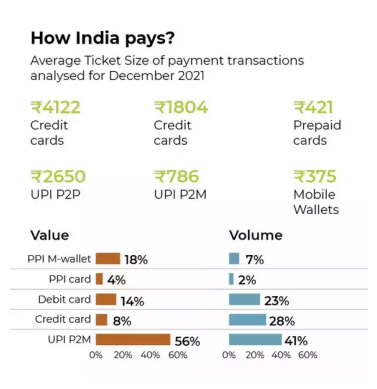

In [ ]:
import re
import os
import cv2
import matplotlib.pyplot as plt


# Function to extract image references from the text
def extract_image_references(text):
    pattern = r"\[Image:\s*(.*?)\]"
    image_references = re.findall(pattern, text)
    return image_references

# Function to display an image using Matplotlib
def display_image(image_path):
    # Check if the image file exists
    if os.path.exists(image_path):
        # Load and display the image
        image = cv2.imread(image_path)
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        plt.imshow(image_rgb)
        plt.axis('off')  # Hide axis
        plt.show()
    else:
        print(f"Image file {image_path} not found.")

# Example usage
image_references = extract_image_references(result["source_documents"][0].page_content)
print("Extracted image references:", image_references)

# Assume images are stored in "output/images"
image_folder = "extracted_images_new"

# Display each referenced image
for image_file in image_references:
    image_path = os.path.join(image_folder, image_file)
    print(f"Displaying {image_file}...")
    display_image(image_path)



The product metric pyramid categorizes metrics into three levels: the North Star metric, 2-3 less important metrics linked to actions impacting the North Star, and granular metrics measuring current actions.
Extracted image references: ['page_16_img_1.png', 'page_14_img_1.png']
Displaying page_16_img_1.png...


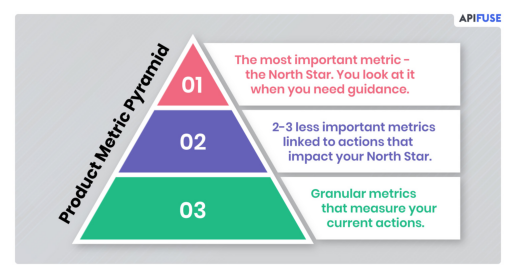

Displaying page_14_img_1.png...


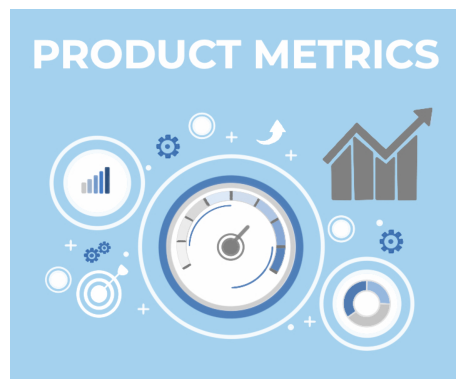

In [ ]:
result = qa_chain({"query": "explain product metric pyramid"})
print(result['result'])

ret_text=""
for doc in result["source_documents"]:
  ret_text=ret_text+doc.page_content

image_references = extract_image_references(ret_text)
print("Extracted image references:", image_references)

for image_file in image_references:
    image_path = os.path.join(image_folder, image_file)
    print(f"Displaying {image_file}...")
    display_image(image_path)

In [ ]:
ret_text=""
for doc in result["source_documents"]:
  ret_text=ret_text+doc.page_content

In [ ]:
result["source_documents"][0].page_content

'**Summary:**\n- The image contains a flow chart starting with "CRIED," which breaks down into three parts:\n  1. Clarify\n  2. Rule out\n  3. Internal & External Data'

## Understanding images and text together
 in documents like PDFs, PowerPoint presentations (PPTs), and webpages is crucial for fully grasping the information conveyed. These types of documents often combine visual and textual content to deliver richer, more comprehensive communication. Here’s why this multimodal understanding is important, with examples for each type of document:

### 1. PDFs
Need: PDFs are commonly used for official documents, reports, academic papers, and manuals. They often include both textual explanations and visual elements like charts, graphs, diagrams, and images. To fully understand the content, it’s necessary to interpret the images in the context of the accompanying text.

- Example:

Research Paper: A scientific PDF might include a complex graph showing the results of an experiment alongside a textual analysis. To understand the findings, you need to interpret the graph (image) in the context of the written analysis (text). If you ignore the image, you might miss critical data; if you ignore the text, you might misunderstand what the data represents.
### 2. PowerPoint Presentations (PPTs)
Need: PowerPoint presentations are widely used for business meetings, academic lectures, and educational purposes. These presentations often use images to complement or emphasize the key points being made in the text. Understanding both the images and the text together is crucial for grasping the intended message.

- Example:

Business Presentation: A slide might show a market share pie chart (image) with bullet points discussing market trends (text). The visual chart quickly communicates the distribution of market share, while the text provides context, such as reasons for the changes or predictions for the future. Understanding the presentation requires synthesizing both the visual and textual information.
### 3. Webpages
Need: Webpages often combine text with images, videos, and interactive elements. The images can provide additional context, attract attention, or simplify complex information. For users and AI systems alike, interpreting both the text and images together is essential for navigating the content effectively.

- Example:

E-commerce Website: A product page might include a detailed description of a product (text) alongside multiple images showing the product from different angles. The text might explain features that aren’t immediately obvious from the images (like material quality), while the images show the product’s appearance. A user needs both to make an informed purchase decision.

### Conclusion
In all these examples—PDFs, PPTs, and webpages—the combination of text and images enriches the content and facilitates better understanding.

- For Humans: This multimodal content mimics natural communication, where visuals and verbal explanations often go hand-in-hand. People generally understand concepts better when they are both shown and told, leading to more effective communication.

- For AI Systems: Understanding both text and images together allows AI to better mimic human comprehension, enabling it to provide more accurate analyses, generate more contextually relevant responses, and enhance user experiences across various domains.

Whether it's comprehending a research finding, making a business decision, or choosing a product online, the ability to process and integrate multimodal information is essential for fully understanding the material.